# 第五章 朴素贝叶斯

## 5.1

In [3]:
import numpy as np
X = np.array([[0, 1, 0, 1],
              [1, 1, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 0, 1]])
y = np.array( [0, 1, 1, 0, 1, 0, 0])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature counts:\n{}".format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [6]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
Next_Day = [[0, 0, 1, 0]]
pre = clf.predict(Next_Day)
print('\n\n\n代码运行结果：')
print('==============')
if pre == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")
print('==============')
print('\n\n\n')




代码运行结果：
要下雨啦，快收衣服啊！






In [9]:
Another_Day = [[1, 1, 0, 1]]
pre2 = clf.predict(Another_Day)
print('\n\n\n代码运行结果：')
print('==============')
if pre2 == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")
print('==============')
print('\n\n\n')




代码运行结果：
放心，又是一个艳阳天






In [11]:
print('\n\n\n代码运行结果：')
print('==============')
print(clf.predict_proba(Next_Day))
print('==============')
print('\n\n\n')




代码运行结果：
[[0.13848881 0.86151119]]






In [13]:
print('\n\n\n代码运行结果：')
print('==============')
print(clf.predict_proba(Another_Day))
print('==============')
print('\n\n\n')




代码运行结果：
[[0.92340878 0.07659122]]






## 5.2 朴素贝叶斯的不同方法

In [19]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
nb = BernoulliNB()
nb.fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==============')
print('模型得分：{:3f}'.format(nb.score(X_test, y_test)))
print('==============')
print('\n\n\n')




代码运行结果：
模型得分：0.544000






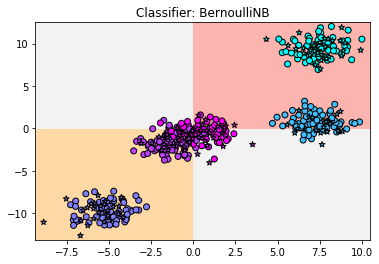

In [28]:
import matplotlib.pyplot as plt
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                    np.arange(y_min, y_max, .02))
z = nb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: BernoulliNB')
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==============')
print('模型得分：{:3f}'.format(gnb.score(X_test, y_test)))
print('==============')
print('\n\n\n')




代码运行结果：
模型得分：0.968000






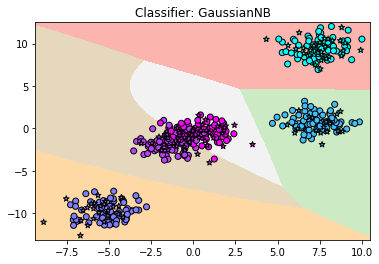

In [30]:
z = gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: GaussianNB')
plt.show()

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
print('\n\n\n代码运行结果：')
print('==============')
print('模型得分：{:3f}'.format(mnb.score(X_test_scaled, y_test)))
print('==============')
print('\n\n\n')




代码运行结果：
模型得分：0.320000






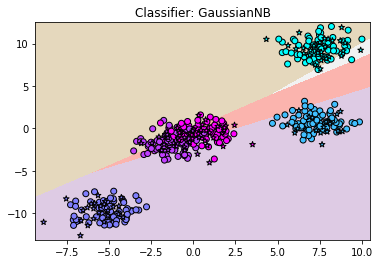

In [32]:
z = mnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: GaussianNB')
plt.show()

## 5.3朴素贝叶斯实战——判断肿瘤是良性还是恶性

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('\n\n\n代码运行结果：')
print('==============')
print(cancer.keys())
print('==============')
print('\n\n\n')




代码运行结果：
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])






In [34]:
print('肿瘤的分类：',cancer['target_names'])
print('\n肿瘤的特征：',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征： ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [35]:
X, y=cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
print('\n\n\n代码运行结果：')
print('==============')
print('训练集的状态：', X_train.shape)
print('测试集的状态：', X_test.shape)
print('==============')
print('\n\n\n')




代码运行结果：
训练集的状态： (426, 30)
测试集的状态： (143, 30)






In [36]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==============')
print('训练集得分：{:3f}'.format(gnb.score(X_train, y_train)))
print('测试集得分：{:3f}'.format(gnb.score(X_test, y_test)))
print('==============')
print('\n\n\n')




代码运行结果：
训练集得分：0.948357
测试集得分：0.944056






In [38]:
print('\n\n\n代码运行结果：')
print('==============')
print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本的正确分类是：',y[312])
print('==============')
print('\n\n\n')




代码运行结果：
模型预测的分类是：[1]
样本的正确分类是： 1






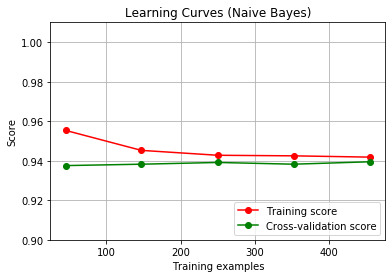

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)
plt.show()